# Hypothesis testing for Larger Samples.

<font color='red' size=5> What is Hypothesis testing? </font>

> <font color='green'> The process of using probability and statistics to set up an experimental situation and decide whether or not to reject the “status quo” hypothesis based on sample data is called hypothesis testing. </font>

Before getting into details of how Hypothesis testing works , let us get ourselfs familiar with some terminology related to Hypothesis testing

<h3><font color='brown'> Terminology </font> </h3>

<ul>
    <li> <b> <font color='blue'> Null Hypothesis </font> </b>[$ H_0$] :  It is the “status quo” or “prior belief” .It assumes that the observation is due to a chance factor.  The null hypothesis is assumed to be true unless proven otherwise.</li>
    <li>  <b> <font color='blue'> Alternative Hypothesis </font> </b>[$ H_1$] :Contrary to the null hypothesis, the alternative hypothesis shows that observations are the result of a real effect.We reject the null hypothesis in favor of the alternative hypothesis only if there is convincing statistical evidence against $H_0$. The alternative hypothesis is sometimes referred to as the research hypothesis.</li>
</ul>

<b> Example</b>:
<img src='https://i.imgur.com/MWHcJ0c.jpg' height="200" width="200">
Suppose we wanted to determine whether a coin was fair and balanced(<b>unbiased</b>). A <b>Null hypothesis</b> states that half the flips would result in Heads and half in Tails.This can mathematically be written as follows 

$$ H_o: P(Head) = 0.5$$

Now the coin is tossed let's say 10 times and 7 Heads and 3 Tails are observed.Now <b>Alternative hypothesis</b> states that the coin is a <b>biased</b>  one as we did'nt observe equal number of Heads and Tails in our experiment.

$$ H_1: P(Head){\neq} 0.5$$

Now let's go back and visit our definition of $ H_0$ -<b>"It assumes that the observation is due to a chance factor"</b>.A chance factor is an influence that contributes randomly to each observation, and is unpredictable. <font color='#aa1103'><b>In simple sense, Null hypothesis argues that prior belief ( P(Head)= 0.5 in this case) is true and the observations from experiment is due to some randomness and hence can be ignored.</b></font>

The definition of $ H_1$ says that -<b>"Contrary to the null hypothesis, the alternative hypothesis shows that observations are the result of a real effect"</b>. Therefore <font color='#29bf03'><b>alternative hypothesis argues that observations of the experiment are biased because the coin itself is a biased-coin and not due to some chance factor.</b></font>

Now that we are done with Null hypotheis and Alternate Hypothesis , let's move to the next terms

## Import section

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable
from IPython.display import HTML, display
plt.xkcd()

Output hidden; open in https://colab.research.google.com to view.

## Download dataset

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           8842        269  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            788         35  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           2108         68  1.0              
evangower/premier-league-match-

In [ ]:
! kaggle datasets download -d sdolezel/black-friday
!unzip /content/black-friday.zip

 93% 7.00M/7.51M [00:00<00:00, 69.0MB/s]
100% 7.51M/7.51M [00:00<00:00, 71.6MB/s]
Archive:  /content/black-friday.zip
  inflating: test.csv                
  inflating: train.csv               


train.csv

The dataset here is a sample of the transactions made in a retail store on blackFriday

https://www.kaggle.com/datasets/sdolezel/black-friday


In [ ]:
df = pd.read_csv('train.csv')
print("number of data points in our popultion:", df.shape)
print("% of missing values",df['Purchase'].isnull().sum() * 100 / len(df))
df.head(2)

number of data points in our popultion: (550068, 12)
% of missing values 0.0


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


Number of samples in our data:  550068


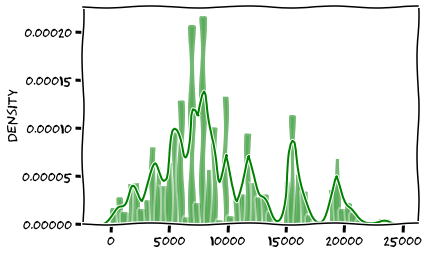

In [ ]:
data = np.array(df['Purchase'].values)
print("Number of samples in our data: ",data.shape[0])
sns.distplot(data, color='g')
plt.show()
# population mean
population_mean = np.round(data.mean(),3)
# population std
population_std = np.round(data.std(),3)

Number of samples in our data:  550068


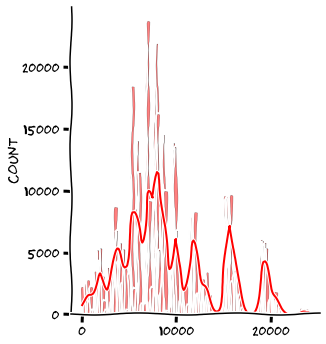

In [ ]:
data = np.array(df['Purchase'].values)
print("Number of samples in our data: ",data.shape[0])
sns.displot(data, color='r', kde = True)
plt.show()
# population mean
population_mean = np.round(data.mean(),3)
# population std
population_std = np.round(data.std(),3)

In [ ]:
count = 0
for i in range(10):
    # we are tossing a coin here
    trail = np.random.uniform(0,1)<0.5
    print(trail)
    count+=int(trail)
print("Number of heads:",count, "Number of tails:", 10-count)

False
True
True
True
True
True
False
False
True
True
Number of heads: 7 Number of tails: 3


The two types of hypothesis tests, based on the alternative hypothesis  $ H_1$, are: 
<ul>
    <li> <b> <font color='blue'> Two-sided, or two-tailed, tests: </font> </b>
         When you want to detect a difference on either side of the mean, the test is said to be two-tailed and takes the form
        $ H_1: μ{\neq} value$. The two-sided test for the above example can be given as follows,<br> $$ H_1: P(Head){\neq} 0.5$$.Graphically a two tailed test can be represented as </li>
        <img src='https://i.imgur.com/r6jgJpv.gif' height="300" width="300">
        
    
   <li>  <b> <font color='blue'> One-sided, or one-tailed, tests: </font> </b> When you want to detect a difference on only one side of the mean, the test is said to be one-sided and takes the form $ H_1: μ < value$ or $ H_1: μ > value $. One sided test for the above problem can be given as <br> $$ H_1: P(Head) > 0.5$$ <img src='https://i.imgur.com/i4PhluQ.gif' height="300" width="300"><h5 align="center">(or)</h5><br>  $$ H_1: P(Head) < 0.5$$.<br><img src='https://i.imgur.com/YDZl9Rn.gif' height="300" width="300"></li>


Note: Since we are showing the plots of normal distribution, it didn't mean that hypothesis test only applicable for only normal distribution.
</ul>


When an Hypothesis test is performed, we either have to reject Null hypothesis or fail to reject it. The possible errors that may occur are <br>
<img src='https://i.imgur.com/RMqB45E.png' width=500>

<b> <font color='blue'> Type-I error: </font> </b>

* A Type I error occurs when the researcher rejects a null hypothesis when it is true
* The probability of committing a Type I error is called the <b>significance level</b>.
* his probability is also called <b>alpha</b>, and is often denoted by <b>α</b>.
* Type one error can be interpreted as-
$$ α=P(Type\, I\, error)=P(Reject\, H_0 \,when\, H_0 \,is \,true)$$
        
        
    
<b> <font color='blue'> Type -II error: </font> </b> 

* A Type II error occurs when the researcher fails to reject a null hypothesis that is false.
* The probability of committing a Type II error is called <b>Beta</b>, and is often denoted by <b>β</b>.
* The probability of not committing a Type II error is called the <b>Power of the test</b>.
* Type two error can be interpreted as - 
$$ β=P(Type \,II \,error)=P(fail\, to \,reject\, H_0 \,when \,H_0 \,is \,actually\, false)$$
         
        

 
   


Note :-  We would like the probability of committing either one of these errors to be as small as possible. Unfortunately, decreasing the probability of committing one type of error only increases the probability of committing the other type of error.So our main focus of interest would be <b>Type I error</b> , i.e 𝛼

<font size=5 color='red'> Significance level (${\alpha}$)</font>

> <font color='green'>Graphically can we explain what Significance level means?</font>

The significance level determines how far out from the null hypothesis value we'll draw that line on the graph. To draw a significance level of 0.05, we need to shade the 5% of the distribution that is furthest away from the null hypothesis.

<img src='https://i.imgur.com/sLRb6Wu.png' height="500" width="500">

The shaded region is also called as <font color='red'> Critical region </font> and the if the sample mean falls into that region ,we reject the Null Hypothesis $H_0$ .<br>
<font color='blue'>What does a significance level of α = 0.05 mean? </font>It means that if H0 is actually true and the hypothesis test is repeated on different random samples of data from the same population, then we would expect H0 to be incorrectly rejected 5% of the time. 

<h3><font color='red'> $pValue$ </font></h3>

>P-values are the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis.

$$ pValue=P(Occuring\ of observation | H_0\ is\ assumed\ to\ be\ true)$$

<h3> <font color='blue'> We fail to reject the null hypothesis $H_0$ if $p{Value> \alpha }$ and reject if  $p{Value< \alpha }$.</h3>


<font color='orange' size=5><b>The Misunderstood p Value </b></font>

<img src='https://imgs.xkcd.com/comics/null_hypothesis.png'>

* The p value is one of the most misunderstood quantities in psychological research. Even professional researchers misinterpret it, and it is not unusual for such misinterpretations to appear in statistics textbooks!

* The most common misinterpretation is that the p value is the probability that the null hypothesis is true—that the sample result occurred by chance. For example, a misguided researcher might say that because the p value is .02, there is only a 2% chance that the result is due to chance and a 98% chance that it reflects a real relationship in the population. 
But this is incorrect. The p value is really the probability of a result at least as extreme as the sample result if the null hypothesis were true. So a p value of .02 means that if the null hypothesis were true, a sample result this extreme would occur only 2% of the time.

* You can avoid this misunderstanding by remembering that the p value is not the probability that any particular hypothesis is true or false. Instead, it is the probability of obtaining the sample result if the null hypothesis were true.

Credit: https://opentextbc.ca/researchmethods/chapter/understanding-null-hypothesis-testing/

<h3><font color='red'> $z-Score$ </font></h3>

A z-score (aka, a standard score) indicates how many standard deviations an element is from the mean. A z-score can be calculated from the following formula.<font color='red'> $$z =\frac{(\overline{x}-\mu)}{\frac{\sigma}{\sqrt{n}}}$$</font> 

Here is how to interpret z-scores.
<ul>

<li>A z-score less than 0 represents an element less than the mean.</li>
<li>A z-score greater than 0 represents an element greater than the mean.</li>
<li>A z-score equal to 0 represents an element equal to the mean.</li>
<li>A z-score equal to 1 represents an element that is 1 standard deviation greater than the mean; a z-score equal to 2, 2 standard deviations greater than the mean; etc.</li>
<li>A z-score equal to -1 represents an element that is 1 standard deviation less than the mean; a z-score equal to -2, 2 standard deviations less than the mean; etc.</li>

Enough of theory , now let's jump into Hypothesis implementation with example

## Example 1:

<img src='https://imgs.xkcd.com/comics/significant.png'>
credit: https://xkcd.com/882/

><font color='blue'>A survey shows that the average black friday sales of male is much higher(500$) when compared to that of female. A company which is planning for it's black friday sales want to know if this is true and hence wanted to take data from samples of different sizes such as 100,500,1000 from the population and note their black friday spending details.The company wants to know if there is really any difference in spending or it is just by chance(with significance leve 15%). Can you help the company come to a conclusion on this with the help of data provided about different samples?</font> 

# <b>Stating Null Hypothesis and Alternate Hypothesis</b>

<font color='brown'> Null Hypothesis $H_0$</font>:The average spending of male and female is same i.e, $\mu_m= \mu_f$ 

<font color='brown'> Alternative Hypothesis $H_a$</font>: The average spending of male is greater than that of female, i.e, $\mu_m > \mu_f $ 

<b>Choosing significance level</b>

As it was not mentioned in the problem we are taking the standard significance level <font color='red'> $\alpha=0.15 $</font>


<b>Setting up Test Statistic</b>

<font color='brown'>How do we decide whether or not to reject the null hypothesis H0 ?</font>
<br>a. we start by determining a test statistic with our sample data

<font color='brown'>What is test statistic?</font>
<br>a. It is the evidence that we look for, to prove our null hypothesis
<br>b. The most natural choice for a test statistic of the difference in population mean is the difference in sample mean $ \mu_m-\mu_f $.

---
---



 
 

In [ ]:
def plt_cdfplot_withthreshold(j,c,difference,threshold,sample):
    sns.kdeplot(difference,cumulative=True,color=c, ax=axs[j])
    axs[j].axvline(threshold, linestyle="--", color='r', label=int(threshold))
    axs[j].set_title("CDF of differences for " + str(sample)+" samples")
    axs[j].legend()
    axs[j].grid()

In [ ]:
def diff_in_samples(dist1, dist2, gender1, gender2):
    print("The average spendings "+str(len(dist1))+" "+gender1+" =",dist1.mean())
    print("The average spendings "+str(len(dist2))+" "+gender2+"=",dist2.mean())
    diff_in_mean = dist1.mean()-dist2.mean()
    print("The difference between mean of "+gender1+" spending and "+gender2+" spendings (diff_"+str(len(dist2))+")=",diff_in_mean)
    return diff_in_mean

# Lets Calculate the P_Value using Permutation resampling test

## <font color='blue'>Understanding Permutation Resampling Test</font>

* Let us assume example of heights of students in classes 1 and 2 and problem that their heights are same.

<font color='brown'><b>Step 1:</b></font> take samples of the class 1 and class2 and find the mean of those samples and find 
$Δ = μ2 - μ1$

<font color='brown'><b>Step 2:</b></font> now join those two random variables and take two samples randomly  from that joined collection and find the difference of those sample means this difference be denoted as $𝛿1$.
 
<font color='brown'><b>Step 3:</b></font> We shall repeat this process for a certain number of times(say 10000) and obtain
all the values of the sample mean differences. Let them be denoted as $‘𝛿1’, ‘𝛿2’,
‘𝛿3’,........ ‘𝛿10k’.$
 
<font color='brown'><b>Step4:</b></font> now sort all these sample mean differences and let these sample means in the sorted order be denoted as ‘𝛿1|’, ‘𝛿2|’, ‘𝛿3|’,........ ‘𝛿10k|’. Now from the increasing order of these sample means, we have to check what percentage of the values are greater than ‘Δ’. (ie., $Δ = μ2 - μ1)$
 
<font color='brown'><b>Step5:</b></font> Let’s say 5% of the values are greater than ‘Δ’, then P - value = 5/100 = 0.05 If x% of the values are greater than ‘Δ’, then P - value = $x/100.)$

In [ ]:
def calculate_p_value(sample1, sample2, diff, alpha):
    #Step 2- Create list to store the average values of both the samples and the difference of them
    difference=[]
    #Sampling the data for 1000 times
    total_sample = list(sample1)
    total_sample.extend(sample2)
    total_sample = np.array(total_sample)
    for i in range(0,1000):
        #Picking 100 random numbers 
        samples = random.sample(range(0, len(total_sample)), 100)
        #First 50 random numbers are taken as set 1
        set1 = total_sample[samples[:50]].mean()
        #Next 50 random numbers are taken as set 2
        set2 = total_sample[samples[50:]].mean()
        #Taking the differnce between the two sets
        difference.append(set1 - set2)
        
    #Step3- Sorting the values and counting the number of values greater than the threshold
    difference.sort()
    count = sum(((i > diff) and (i>0)) for i in difference) 
    pValue = count/len(difference)
    print("Percentage of values greater than the difference",diff," =",pValue*100,"%")
    print("The pValue = ",pValue, "and the significance P(Reject H0 when H0 is true)=",alpha)
    if pValue>alpha:
        print("We fail to reject the null hypothesis")
    else:
        print("We can reject the null hypothesis")
    
    print('_'*50)
    return difference

<font color='brown'>Q: Assuming that  $H_0$  is true, what’s the probability of obtaining $ \mu_m -  \mu_f $ = $diff\_100$ for the random sample of 100 data points each?</font>


For Sample Size:  200
The average spendings 100 male = 9457.61
The average spendings 100 female= 8859.02
The difference between mean of male spending and female spendings (diff_100)= 598.5900000000001
Percentage of values greater than the difference 598.5900000000001  = 25.5 %
The pValue =  0.255 and the significance P(Reject H0 when H0 is true)= 0.15
We fail to reject the null hypothesis
__________________________________________________
For Sample Size:  1000
The average spendings 500 male = 9418.694
The average spendings 500 female= 8729.642
The difference between mean of male spending and female spendings (diff_500)= 689.0519999999997
Percentage of values greater than the difference 689.0519999999997  = 23.5 %
The pValue =  0.235 and the significance P(Reject H0 when H0 is true)= 0.15
We fail to reject the null hypothesis
__________________________________________________
For Sample Size:  2000
The average spendings 1000 male = 9674.689
The average spendings 1000 female= 8779.333
T

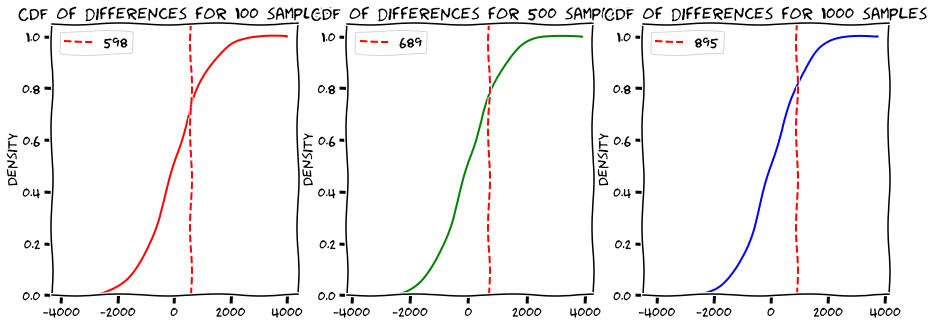

In [ ]:
#red, green, blue, yellow, etc
colrs = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
data_female = np.array(df[df['Gender']=='F']['Purchase'].values)
data_male = np.array(df[df['Gender']=='M']['Purchase'].values)
sample_sizes = [100, 500, 1000]
alpha = 0.15
fig, axs = plt.subplots(1, 3,figsize=(15, 5))
for j, i in enumerate(sample_sizes):
    print("For Sample Size: ", 2*i)    
    female_sample=data_female[random.sample(range(0, data_female.shape[0]), i)]
    male_sample=data_male[random.sample(range(0, data_male.shape[0]), i)]   
    diff_in_mean = diff_in_samples(male_sample,female_sample, "male", "female")   
    #Step 1- Combine both samples of size 50 each to a large sample of size 100 to simulate null hypothesis
    differences = calculate_p_value(male_sample, female_sample,diff_in_mean, alpha)
    plt_cdfplot_withthreshold(j, colrs[j],differences,threshold=diff_in_mean,sample=i)

If we reject the null hypothesis, we do not prove the alternative hypothesis is true. We merely state there is sufficient evidence to reject the null hypothesis.

If we fail to reject the null hypothesis, we do not prove the null hypothesis is true. We merely state there is not sufficient evidence to reject the null hypothesis.

Unfortunately, whatever the decision, there is always a chance we made an error!